## Setup and Data Loading

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
titanic_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

In [76]:
df = pd.read_csv(titanic_url)
print("train.csv downloaded successfully from GitHub.")
df.head()

train.csv downloaded successfully from GitHub.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
df.shape

(891, 12)

In [78]:
print("\nOriginal DataFrame Info:\n")
df.info()


Original DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis (EDA)

In [79]:
print("\nBasic Statistics:\n")
df.describe()


Basic Statistics:



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [80]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [81]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [82]:
print("\nMissing values before preprocessing:\n")
print(df.isnull().sum())


Missing values before preprocessing:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [83]:
null_percentage = df.isnull().sum() / len(df) * 100
print(null_percentage)
# age , cabin , embarked

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


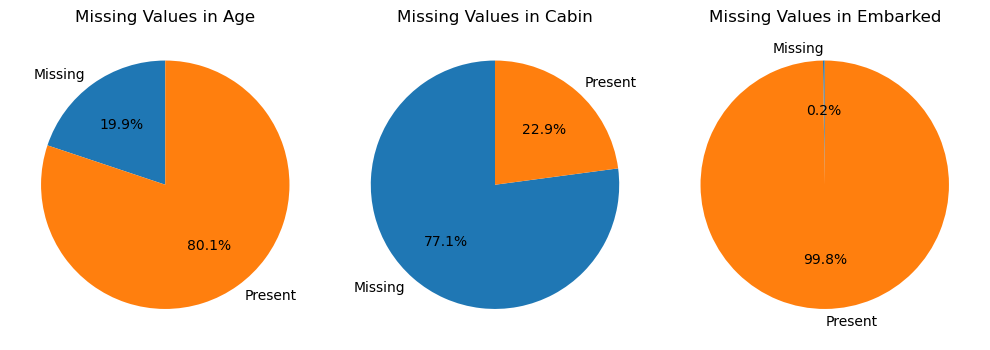

In [84]:
age_data = [null_percentage['Age'], 100 - null_percentage['Age']]
cabin_data = [null_percentage['Cabin'], 100 - null_percentage['Cabin']]
embarked_data = [null_percentage['Embarked'], 100 - null_percentage['Embarked']]

plt.figure(figsize=(10, 4))

# Pie chart for Age
plt.subplot(1, 3, 1) # Changed to 1 row, 3 columns
plt.pie(age_data, labels=['Missing', 'Present'], autopct='%1.1f%%', startangle=90)
plt.title('Missing Values in Age')

# Pie chart for Cabin
plt.subplot(1, 3, 2) # Changed to 1 row, 3 columns
plt.pie(cabin_data, labels=['Missing', 'Present'], autopct='%1.1f%%', startangle=90, )
plt.title('Missing Values in Cabin')

# Pie chart for Embarked
plt.subplot(1, 3, 3) # Added a third subplot for Embarked
plt.pie(embarked_data, labels=['Missing', 'Present'], autopct='%1.1f%%', startangle=90)
plt.title('Missing Values in Embarked')

plt.tight_layout()
plt.show()

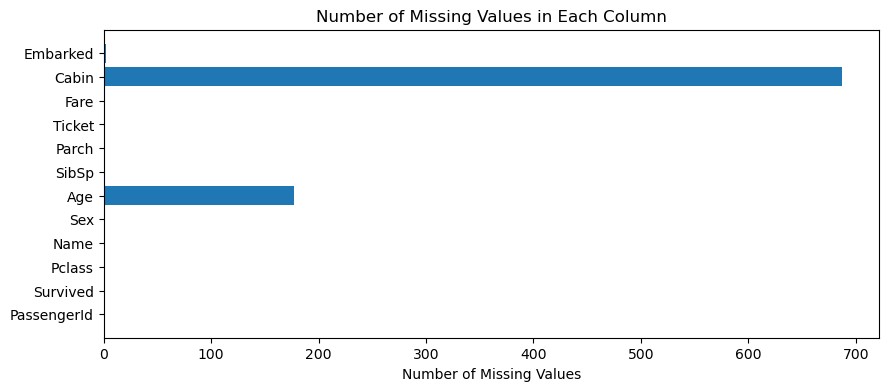

In [85]:
plt.figure(figsize=(10, 4))
plt.barh(df.columns, df.isnull().sum())
plt.xlabel('Number of Missing Values')
plt.title('Number of Missing Values in Each Column')
plt.show()

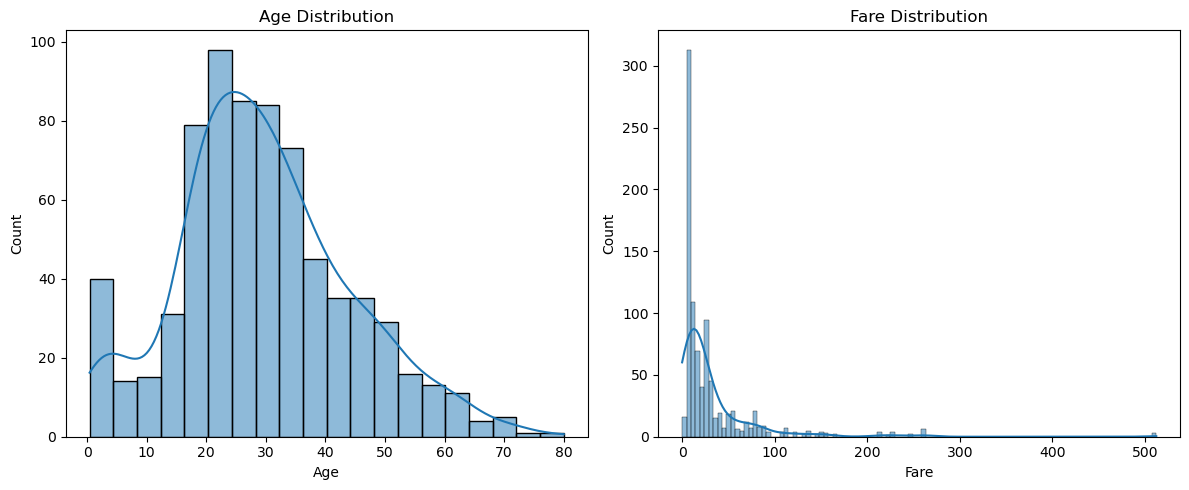

In [86]:
# Visualize distributions of key features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True,)# essential
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

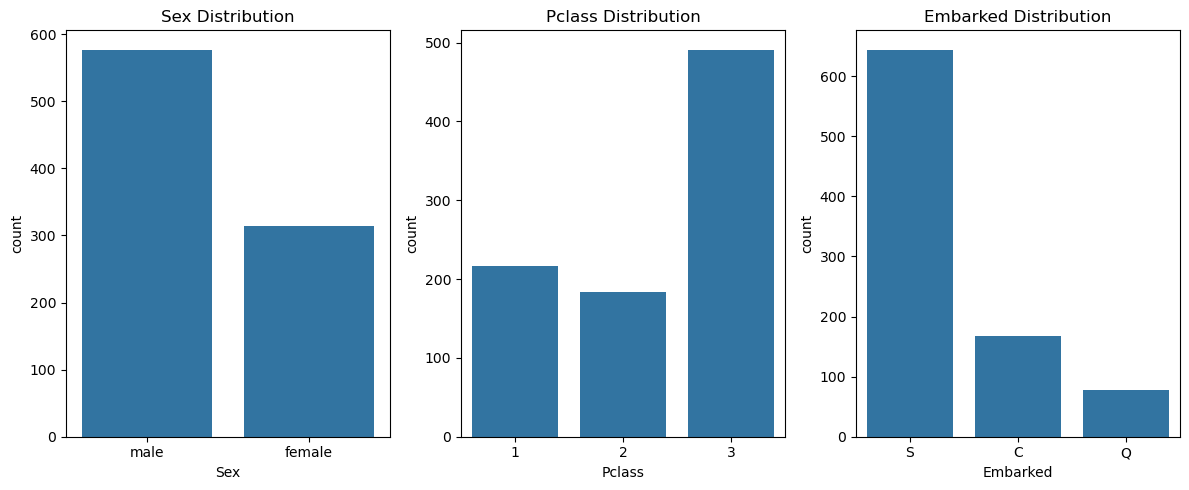

In [87]:
# Investigate categorical features
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='Pclass', data=df)
plt.title('Pclass Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Distribution')

plt.tight_layout()
plt.show()

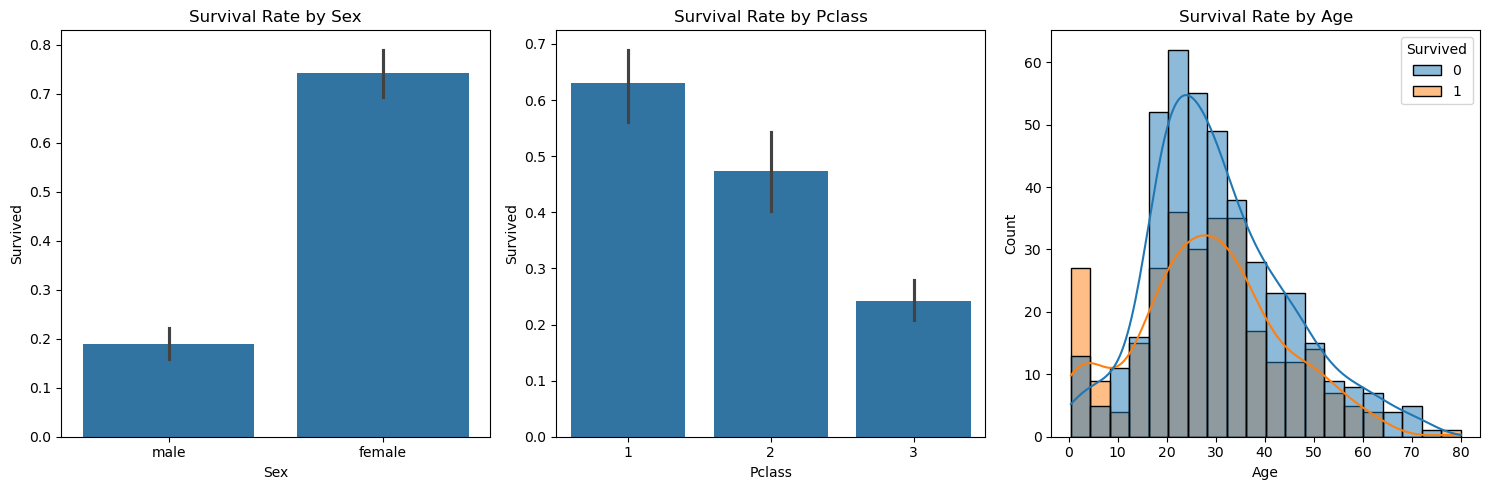

In [88]:
# Relationship with the target variable (Survived)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')

plt.subplot(1, 3, 2)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')

plt.subplot(1, 3, 3)
sns.histplot(x='Age', hue='Survived', data=df, kde=True)
plt.title('Survival Rate by Age')
plt.tight_layout()
plt.show()

In [89]:
# df_cleaned = df.copy()
# df_dropped = df_cleaned.dropna(subset=['Age', 'Embarked', 'Cabin'])
# print(f"\nShape after dropping rows with missing Age , Embarked , Cabin : {df_dropped.shape}")
imputer_mean = SimpleImputer(strategy='mean') #define for the imputer
df_cleaned['Age_imputed_mean'] = imputer_mean.fit_transform(df_cleaned[['Age']]) 

print("\nMissing values in Age after mean imputation:")
print(df_cleaned[['Age', 'Age_imputed_mean']].isnull().sum())


Missing values in Age after mean imputation:
Age                 177
Age_imputed_mean      0
dtype: int64


In [90]:
mode = df_cleaned['Embarked'].mode()[0]
# print(mode)
df_cleaned['Embarked_imputed_mode'] = df_cleaned['Embarked'].fillna(mode)
print("\nMissing values in Embarked after mode imputation:")
print(df_cleaned[['Embarked', 'Embarked_imputed_mode']].isnull().sum())


Missing values in Embarked after mode imputation:
Embarked                 2
Embarked_imputed_mode    0
dtype: int64


In [91]:
df_processed = df.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'])
df_processed['Age'] = SimpleImputer(strategy='mean').fit_transform(df_processed[['Age']])
df_processed['Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df_processed[['Embarked']]).ravel()

print("\nMissing values after chosen imputation strategy:")
print(df_processed.isnull().sum())


Missing values after chosen imputation strategy:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [92]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


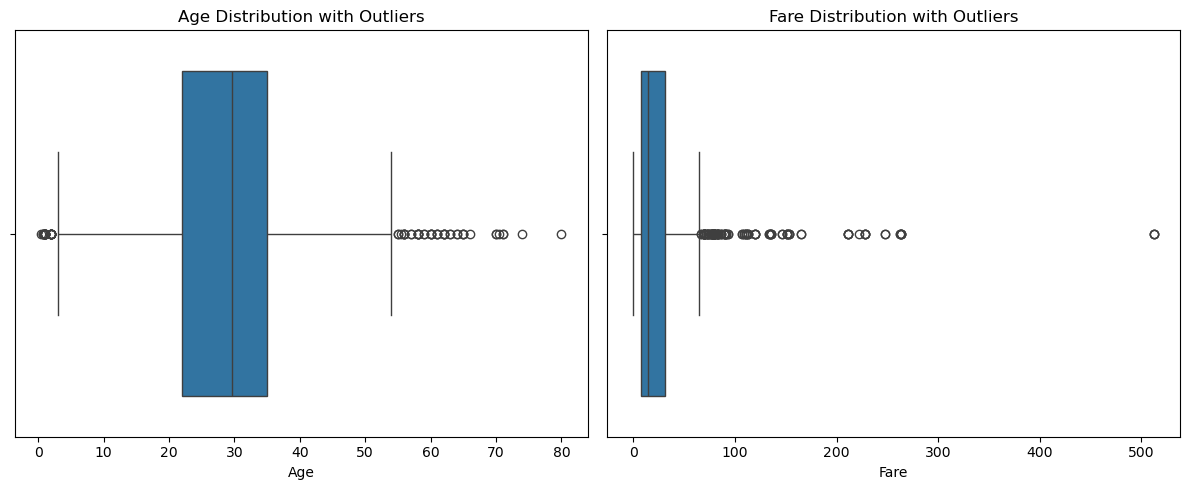

In [93]:
# Outliers on numeric features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Age', data=df_processed)
plt.title('Age Distribution with Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x='Fare', data=df_processed)
plt.title('Fare Distribution with Outliers')

plt.tight_layout()
plt.show()

In [94]:
Q1 = df_processed['Fare'].quantile(0.25)
Q3 = df_processed['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_processed['Fare'] = df_processed['Fare'].clip( lower=lower_bound, upper=upper_bound )
age_lower = df_processed['Age'].quantile(0.10)
age_upper = df_processed['Age'].quantile(0.90)
df_processed['Age'] = df_processed['Age'].clip( lower=age_lower, upper=age_upper )

print("Outliers handling completed.")
print(df_processed['Fare'].describe())
print('-'*30)
print(df_processed['Age'].describe())

Outliers handling completed.
count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64
------------------------------
count    891.000000
mean      29.697243
std        9.463775
min       16.000000
25%       22.000000
50%       29.699118
75%       35.000000
max       47.000000
Name: Age, dtype: float64


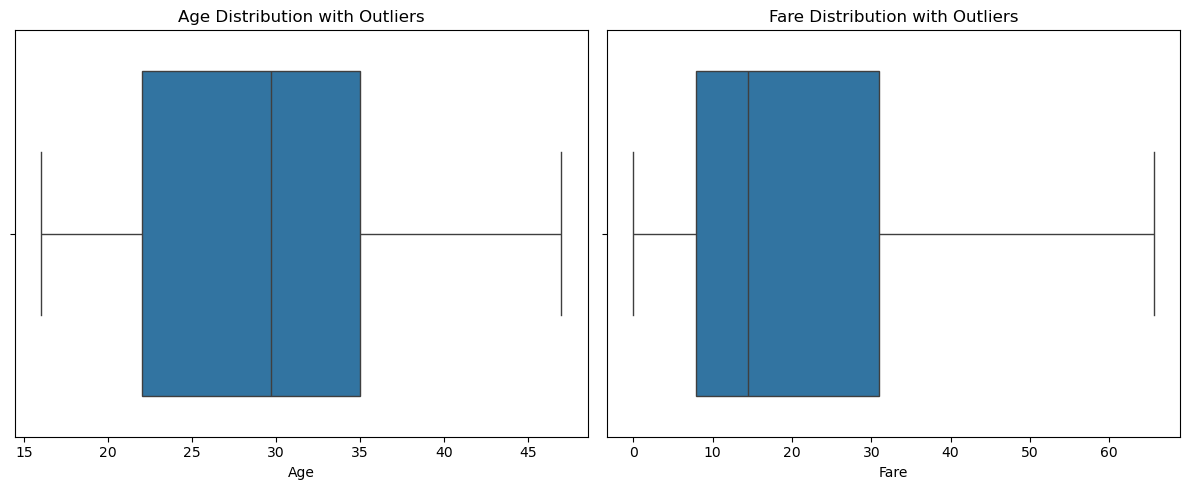

In [95]:
# Outliers on numeric features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Age', data=df_processed)
plt.title('Age Distribution with Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x='Fare', data=df_processed)
plt.title('Fare Distribution with Outliers')

plt.tight_layout()
plt.show()

In [96]:
# Categorical Encoding

df_processed_getdummies = pd.get_dummies(df_processed, columns=['Sex', 'Embarked']) 
print("\nDataFrame after One-Hot Encoding:")
df_processed_getdummies.head()


DataFrame after One-Hot Encoding:


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,65.6344,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [97]:
le = LabelEncoder()
df_processed_le = df.copy()
df_processed_le['Sex'] = le.fit_transform(df['Sex']) # female male
df_processed_le['Embarked'] = le.fit_transform(df['Embarked'])
df_processed_le= df_processed_le.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'])
df_processed_le.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [98]:
categorical_cols=['Sex', 'Embarked']
ordinal_encoder = OrdinalEncoder()
ordinal_df = pd.DataFrame(ordinal_encoder.fit_transform(df_processed[categorical_cols]), columns=categorical_cols)
ordinal_df.head()

,Sex,Embarked
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0


In [99]:
ohe= OneHotEncoder(sparse_output=False)
encoded= ohe.fit_transform(df_processed[categorical_cols])
encoded_df= pd.DataFrame(encoded, columns=ohe.get_feature_names_out(categorical_cols))
df_processed= pd.concat([df_processed.drop(columns=categorical_cols), encoded_df], axis=1)
df_processed.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,65.6344,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [100]:
# 6. Feature Scaling
X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [101]:
numerical_cols_to_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [102]:
scaler_standard = StandardScaler()
X_train_scaled_standard = X_train.copy()
X_test_scaled_standard = X_test.copy()

X_train_scaled_standard[numerical_cols_to_scale] = scaler_standard.fit_transform(X_train[numerical_cols_to_scale])
X_test_scaled_standard[numerical_cols_to_scale] = scaler_standard.transform(X_test[numerical_cols_to_scale])

print("\nFeatures after Standardization (first 5 rows of training set):")
X_train_scaled_standard[numerical_cols_to_scale].head()


Features after Standardization (first 5 rows of training set):


,Age,SibSp,Parch,Fare
692,-0.013531,-0.465084,-0.466183,1.587890
481,-0.013531,-0.465084,-0.466183,-1.168968
527,-0.013531,-0.465084,-0.466183,2.033832
855,-1.245276,-0.465084,0.727782,-0.712711
801,0.123432,0.478335,0.727782,0.111968


In [103]:
X_train_final, X_test_final = X_train_scaled_standard, X_test_scaled_standard

In [104]:
# Feature Engineering

# Create 'FamilySize'
X_train_final['FamilySize'] = X_train_final['SibSp'] + X_train_final['Parch'] + 1
X_test_final['FamilySize'] = X_test_final['SibSp'] + X_test_final['Parch'] + 1

# Create 'IsAlone'
X_train_final['IsAlone'] = (X_train_final['FamilySize'] == 1).astype(int)
X_test_final['IsAlone'] = (X_test_final['FamilySize'] == 1).astype(int)

In [105]:
print("\nFeatures after Engineering (first 5 rows of training set, showing new features):\n")
print(X_train_final[['FamilySize', 'IsAlone']].head())


Features after Engineering (first 5 rows of training set, showing new features):

     FamilySize  IsAlone
692    0.068733        0
481    0.068733        0
527    0.068733        0
855    1.262698        0
801    2.206117        0


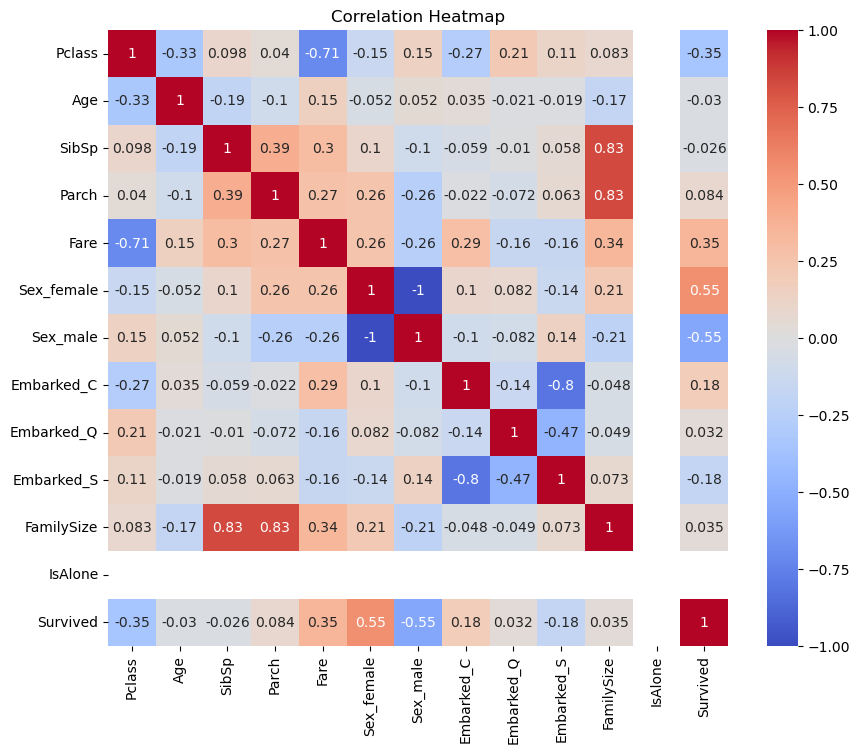

In [106]:
plt.figure(figsize=(10, 8))
df_final = pd.concat([X_train_final, y_train], axis=1)
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [107]:
df_final= df_final.drop('Sex_male',axis=1)

In [108]:
X_train_selected_features = df_final.corr()['Survived'].abs().sort_values(ascending=False).iloc[1:6].index.tolist()
X_train_selected = X_train_final[X_train_selected_features]
X_test_selected = X_test_final[X_train_selected_features]
print(f"\nTop 5 features correlated with 'Survived': {X_train_selected_features}")
print("\nX_train_selected head (top 5 correlated features):")
X_train_selected.head()


Top 5 features correlated with 'Survived': ['Sex_female', 'Pclass', 'Fare', 'Embarked_C', 'Embarked_S']

X_train_selected head (top 5 correlated features):


,Sex_female,Pclass,Fare,Embarked_C,Embarked_S
692,0.0,3,1.587890,0.0,1.0
481,0.0,2,-1.168968,0.0,1.0
527,0.0,1,2.033832,0.0,1.0
855,1.0,3,-0.712711,0.0,1.0
801,1.0,2,0.111968,0.0,1.0


In [109]:
# 9. Addressing Imbalanced Datasets
print("\nTarget variable distribution (Survived) in training set:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True) * 100)


Target variable distribution (Survived) in training set:
Survived
0    439
1    273
Name: count, dtype: int64
Survived
0    61.657303
1    38.342697
Name: proportion, dtype: float64


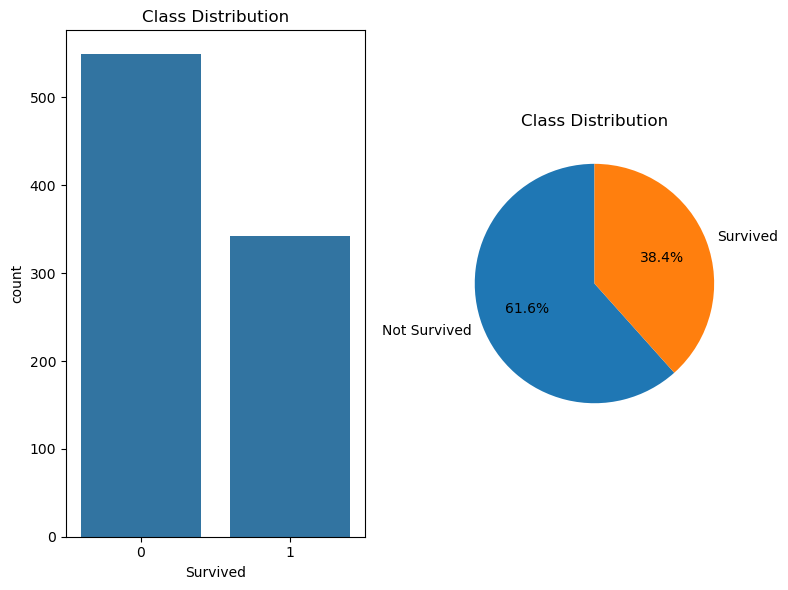

In [110]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Survived', data=df)
plt.title('Class Distribution')

plt.subplot(1, 2, 2)
plt.pie(df['Survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')

plt.tight_layout()
plt.show()

In [111]:
df_final.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
FamilySize    0
IsAlone       0
Survived      0
dtype: int64

In [112]:
df_final.dtypes

Pclass          int64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Sex_female    float64
Embarked_C    float64
Embarked_Q    float64
Embarked_S    float64
FamilySize    float64
IsAlone         int64
Survived        int64
dtype: object

In [113]:
df_final.duplicated().sum()

np.int64(106)

<Axes: xlabel='Fare'>

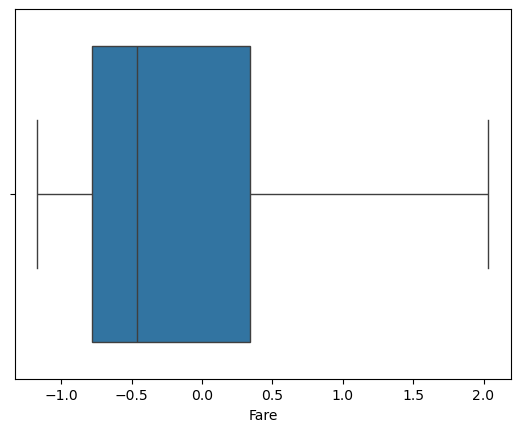

In [114]:
sns.boxplot(x=df_final['Fare'])

<Axes: >

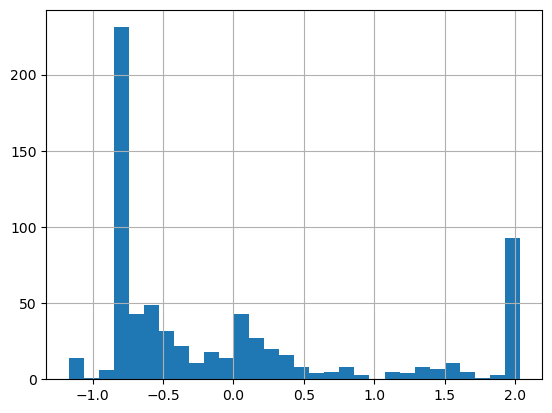

In [115]:
df_final['Fare'].hist(bins=30)

In [116]:
df_final.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Survived
Pclass,1.000000,-0.326988,0.097900,0.040467,-0.707654,-0.145052,-0.272031,0.214760,0.113399,0.082919,NaN,-0.348007
Age,-0.326988,1.000000,-0.189207,-0.101220,0.152863,-0.051944,0.035303,-0.020908,-0.018891,-0.174044,NaN,-0.030255
SibSp,0.097900,-0.189207,1.000000,0.392269,0.302568,0.100430,-0.058580,-0.010491,0.058442,0.834347,NaN,-0.026115
Parch,0.040467,-0.101220,0.392269,1.000000,0.269434,0.256527,-0.022306,-0.072073,0.063077,0.834347,NaN,0.084178
Fare,-0.707654,0.152863,0.302568,0.269434,1.000000,0.256973,0.287946,-0.157079,-0.162156,0.342784,NaN,0.345627
Sex_female,-0.145052,-0.051944,0.100430,0.256527,0.256973,1.000000,0.100746,0.081956,-0.138836,0.213914,NaN,0.549171
Embarked_C,-0.272031,0.035303,-0.058580,-0.022306,0.287946,0.100746,1.000000,-0.142505,-0.804811,-0.048473,NaN,0.180029
Embarked_Q,0.214760,-0.020908,-0.010491,-0.072073,-0.157079,0.081956,-0.142505,1.000000,-0.472784,-0.049478,NaN,0.031501
Embarked_S,0.113399,-0.018891,0.058442,0.063077,-0.162156,-0.138836,-0.804811,-0.472784,1.000000,0.072823,NaN,-0.179163
FamilySize,0.082919,-0.174044,0.834347,0.834347,0.342784,0.213914,-0.048473,-0.049478,0.072823,1.000000,NaN,0.034796


In [119]:
X = df_final.drop('Survived', axis=1)
y = df_final['Survived']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7692307692307693


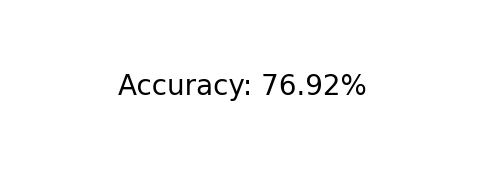

In [121]:
acc = accuracy_score(y_test, y_pred)
plt.figure(figsize=(6, 2))
plt.text(0.5, 0.5, f'Accuracy: {acc:.2%}',fontsize=20, ha='center', va='center')
plt.axis('off')
plt.show()